# Sentiment Analysis Using Various ML Classifiers ans well as using Recurrent Neural Network

### In this notebook you will see text precessing on twitter data set and after that I have performed different Machine Learning Algorithms on the data such as **Logistic Regression, RandomForestClassifier, SVC, Naive Bayes** to classifiy positive and negative tweets. After that I have also built a RNN network which is the best fit for such textual sentiment analysis, since it's a Sequential Dataset which is requirement for RNN network.

#### Let's Dive into it.

# Index

* <a href="#1" style="color: blue;">Importing Libraries</a>
* <a href="#2" style="color: blue;">Loading Dataset</a>
* <a href="#3" style="color: blue;">Data Visualization</a>
* <a href="#4" style="color: blue;">Data Preprocessing</a>
* <a href="#5" style="color: blue;">Analyzing the Data</a>
* <a href="#6" style="color: blue;">Vectorization and Splitting the data</a>
* <a href="#7" style="color: blue;">Model Building</a>
* <a href="#8" style="color: blue;">Logistic Regression</a>
* <a href="#9" style="color: blue;">Linear SVM</a>
* <a href="#10" style="color: blue;">Random Forest</a>
* <a href="#11" style="color: blue;">Naive Bayes</a>
* <a href="#12" style="color: blue;">RNN</a>
* <a href="#13" style="color: blue;">Model Saving, Loading and Prediction</a>

# Importing libraries <a id="1"></a>

In [95]:
# DataFrame
import pandas as pd 

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
# import tensorflow.compat.v2 as tf
# import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

# Loading Dataset <a id="2"></a>

In [142]:
# Construct a tf.data.Dataset
data = pd.read_csv('data/training.1600000.processed.noemoticon.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])

In [143]:
data = data.sample(frac=1)
data = data[:10000]

# Data Visualization <a id="3"></a>

Dataset details
target: the polarity of the tweet (0 = negative, 4 = positive)

* date : the date of the tweet (Sat May 16 23:58:44 PDT 2009)
* polarity : the polarity of the tweet (0 = negative 4 = positive)
* user : the user that tweeted (TerraScene)
* text : the text of the tweet (i'm 10x cooler than all of you)

In [144]:
print("Dataset shape:", data.shape)

Dataset shape: (10000, 6)


In [145]:
data.head(10)

,polarity,id,date,query,user,text
1206043,4,1986694809,Sun May 31 19:11:21 PDT 2009,NO_QUERY,Sharonyy,after the commercial : NEW MOON CLIP !!! .arr
285593,0,1993656324,Mon Jun 01 10:43:35 PDT 2009,NO_QUERY,smerdon90,revising for my a levels
1139179,4,1976906561,Sat May 30 19:30:52 PDT 2009,NO_QUERY,Julie_Anne,Back home at my parents' place
1190869,4,1983793924,Sun May 31 13:50:55 PDT 2009,NO_QUERY,YaniTseng,@DanielKrajeski she said Thank you to you !!
1310882,4,2013375466,Tue Jun 02 22:31:35 PDT 2009,NO_QUERY,TaylorDiane,got in contact with a couple loss friends over...
1539444,4,2180128201,Mon Jun 15 10:02:55 PDT 2009,NO_QUERY,weezybebe,i love crosby and malkin and the stanley cup &...
766863,0,2300165151,Tue Jun 23 13:48:42 PDT 2009,NO_QUERY,teripolzin,@exgirlfriend82 Havent done a thing today Twe...
1358894,4,2048325161,Fri Jun 05 15:01:17 PDT 2009,NO_QUERY,FilmGirl007,@BritneySpears thanks for the follow! @Jaime_S...
172518,0,1963593953,Fri May 29 12:57:41 PDT 2009,NO_QUERY,MissTonix,Doctor Who has finished
1026268,4,1898407617,Sat May 23 18:06:26 PDT 2009,NO_QUERY,Shanniee,@shaundiviney HEY SHAUN LOOK i found the vid...


In [100]:
data.dtypes

polarity     int64
id           int64
date        object
query       object
user        object
text        object
dtype: object

In [101]:
pd.to_datetime(data['date'])

141715    2009-05-22 04:18:50
1067223   2009-05-29 15:56:36
545307    2009-06-16 20:12:38
1299127   2009-06-02 10:21:30
1193741   2009-05-31 14:53:21
                  ...        
1468865   2009-06-07 07:13:40
1412841   2009-06-06 11:41:43
630032    2009-06-18 19:06:59
1450391   2009-06-07 00:47:58
110403    2009-05-17 03:10:05
Name: date, Length: 10000, dtype: datetime64[ns]

In [148]:
data = data.sort_index()

In [149]:
data

,polarity,id,date,query,user,text
409,0,1467916595,Mon Apr 06 22:47:58 PDT 2009,NO_QUERY,LaTtEX,@robcthegeek Once upon a time Hundred Islands ...
1054,0,1468069323,Mon Apr 06 23:32:53 PDT 2009,NO_QUERY,zadr,@simX Yeah. I always slow down at the end ï¿½...
1082,0,1468076498,Mon Apr 06 23:35:06 PDT 2009,NO_QUERY,Dogbook,Jade is looking for a new home... http://apps...
1491,0,1468163470,Tue Apr 07 00:03:42 PDT 2009,NO_QUERY,CoriiB,@junebugg15 I had to super glue my shoe!! Lol
1537,0,1468174365,Tue Apr 07 00:07:09 PDT 2009,NO_QUERY,supclayyy,"really now, time for sleep. dreaming of my cit..."
...,...,...,...,...,...,...
1599222,4,2193374150,Tue Jun 16 08:22:15 PDT 2009,NO_QUERY,richard_iorio,@irishspy His mistake makes a great joke punch...
1599438,4,2193451227,Tue Jun 16 08:28:36 PDT 2009,NO_QUERY,Milann,Online pitching by @ivanainc! see @bonafidebin...
1599725,4,2193525790,Tue Jun 16 08:34:36 PDT 2009,NO_QUERY,KHarrington87,Off to work... but thanks to Wendy I'm done ea...
1599838,4,2193551965,Tue Jun 16 08:36:44 PDT 2009,NO_QUERY,rach_gal,"new to the twitta, someone help."


In [150]:
len(data)

10000

In [158]:
split=int(0.8*len(data))

In [159]:
part1 = data[:split]
part1.to_csv('tweet_part1.csv', index=0)
part1

,polarity,id,date,query,user,text
409,0,1467916595,Mon Apr 06 22:47:58 PDT 2009,NO_QUERY,LaTtEX,@robcthegeek Once upon a time Hundred Islands ...
1054,0,1468069323,Mon Apr 06 23:32:53 PDT 2009,NO_QUERY,zadr,@simX Yeah. I always slow down at the end ï¿½...
1082,0,1468076498,Mon Apr 06 23:35:06 PDT 2009,NO_QUERY,Dogbook,Jade is looking for a new home... http://apps...
1491,0,1468163470,Tue Apr 07 00:03:42 PDT 2009,NO_QUERY,CoriiB,@junebugg15 I had to super glue my shoe!! Lol
1537,0,1468174365,Tue Apr 07 00:07:09 PDT 2009,NO_QUERY,supclayyy,"really now, time for sleep. dreaming of my cit..."
...,...,...,...,...,...,...
1277812,4,2001362629,Tue Jun 02 00:38:22 PDT 2009,NO_QUERY,liverlipz,"@Jwhite4life thanks friend, i better try and g..."
1278088,4,2001393409,Tue Jun 02 00:44:24 PDT 2009,NO_QUERY,henihazbay,@liors no it`s taken from an hotel roof.
1278110,4,2001394301,Tue Jun 02 00:44:34 PDT 2009,NO_QUERY,WWF_Climate,@anomdesign glad I can make someone smile even...
1278290,4,2001413973,Tue Jun 02 00:48:22 PDT 2009,NO_QUERY,iLoveSeventeen,"Ohhh, it's raining again. Somehow, i feel happy"


In [160]:
part2 = data[first_split:second_split]
part2.to_csv('tweet_part2.csv', header=None, index=0)
part2

,polarity,id,date,query,user,text
1278994,4,2001488225,Tue Jun 02 01:02:54 PDT 2009,NO_QUERY,Delight_Yankee,we're now up to 38 fans on our facebook page o...
1279076,4,2001497765,Tue Jun 02 01:04:50 PDT 2009,NO_QUERY,tnsSG,@yangonthu yes...very much so a special office...
1279122,4,2001505790,Tue Jun 02 01:06:24 PDT 2009,NO_QUERY,amara27,had an amazing night walking the red carpet an...
1279183,4,2001508316,Tue Jun 02 01:06:54 PDT 2009,NO_QUERY,yaniratree,"dennys after moving, late safeway run. haagen ..."
1279214,4,2001515257,Tue Jun 02 01:08:19 PDT 2009,NO_QUERY,Dulcie29,"It's raining, it's pouring"
...,...,...,...,...,...,...
1437646,4,2061200559,Sat Jun 06 20:22:56 PDT 2009,NO_QUERY,sissybrandie,survived the SAT exam and I am soooo exhauste...
1437660,4,2061201007,Sat Jun 06 20:23:00 PDT 2009,NO_QUERY,JoannaLord,"@JackLeblond yes please do. in fact, two woul..."
1437765,4,2061229789,Sat Jun 06 20:26:28 PDT 2009,NO_QUERY,eflouwer,"@ichbingio haha, te acheeeeeeeeeeeeeeei i'm f..."
1437907,4,2061248971,Sat Jun 06 20:28:46 PDT 2009,NO_QUERY,Lauratu,I know @Shi1010. I know u would appreciate so...


In [106]:
data['polarity'].unique()

array([0, 4])

In [107]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
141715,0,1881320687,Fri May 22 04:18:50 PDT 2009,NO_QUERY,winzy,@mathewsanders yep! will tweet em out for all ...
1067223,1,1965449906,Fri May 29 15:56:36 PDT 2009,NO_QUERY,jenklonowski,getting ready then heading to t dot with sabzyyy
545307,0,2201391962,Tue Jun 16 20:12:38 PDT 2009,NO_QUERY,saroqq,@laurenok ps wtf ur updates still aren;t comin...
1299127,1,2005905265,Tue Jun 02 10:21:30 PDT 2009,NO_QUERY,sanoJeoJ,@JohnLloydTaylor thats so amazing. i live near...
1193741,1,1984326690,Sun May 31 14:53:21 PDT 2009,NO_QUERY,sarahkate_1206,@OliviaVZ agree with anna.... not possible... ...


In [108]:
data.describe()

,polarity,id
count,10000.000000,1.000000e+04
mean,0.500800,1.998446e+09
std,0.500024,1.943221e+08
min,0.000000,1.467863e+09
25%,0.000000,1.956846e+09
50%,1.000000,2.001404e+09
75%,1.000000,2.177562e+09
max,1.000000,2.329179e+09


In [109]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         10000
No. of positve tagged sentences is:  5008
No. of negative tagged sentences is: 4992


In [110]:
# get a word count per of text
def word_count(words):
    return len(words.split())

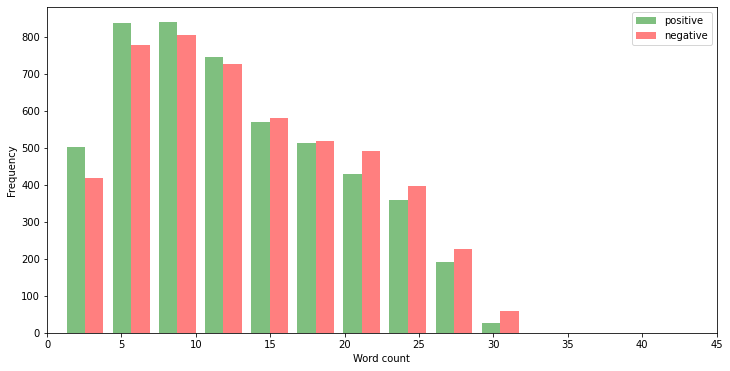

In [111]:
# plot word count distribution for both positive and negative 

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [112]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(20)

[('the', 3124),
 ('and', 1832),
 ('you', 1518),
 ('for', 1359),
 ('have', 903),
 ("i'm", 824),
 ('that', 824),
 ('just', 804),
 ('but', 775),
 ('with', 683),
 ('was', 654),
 ('not', 629),
 ('this', 508),
 ('are', 500),
 ('get', 498),
 ('out', 477),
 ('like', 475),
 ('good', 462),
 ('all', 447),
 ('your', 419)]

# Data Processing <a id="4"></a>

<AxesSubplot:xlabel='polarity', ylabel='count'>

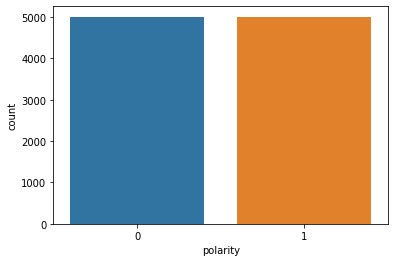

In [113]:
%matplotlib inline
sns.countplot(data['polarity'])

In [114]:
# Removing the unnecessary columns.
data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [115]:
data.drop('id', axis=1, inplace=True)

In [116]:
data.head(10)

,polarity,text
141715,0,@mathewsanders yep! will tweet em out for all ...
1067223,1,getting ready then heading to t dot with sabzyyy
545307,0,@laurenok ps wtf ur updates still aren;t comin...
1299127,1,@JohnLloydTaylor thats so amazing. i live near...
1193741,1,@OliviaVZ agree with anna.... not possible... ...
338707,0,@BLE1 moving to caledonian road - so not far b...
1295222,1,eeeekkkk i'm not a sun person at all at all!!!...
740771,0,I'm going to get a Plurk. I'm going to burn t...
946210,1,Walking home from laurens had fun
384336,0,OMG YALL 2 DAY WAS MA LAST DAY AT SCL 4 THIS Y...


In [117]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [118]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [119]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'hers', 'when', "didn't", 'yourselves', 'herself', 'they', 'few', 'only', 'shouldn', 'wasn', 'she', 'himself', 'our', 'whom', 'been', 'or', 'ma', "haven't", "shouldn't", 'have', 've', 'hadn', 'yourself', "needn't", 'o', 'in', 'can', "wouldn't", "hadn't", 'their', "that'll", "wasn't", "hasn't", 'at', 'too', 'and', 'his', 'a', 'we', 'are', 's', 'm', 'such', 'any', 'am', 'how', 'which', 'me', 'to', 'from', 'as', 'again', 'no', 'he', 'that', 'its', 'some', 'during', 'needn', 'very', 'has', 'doing', "doesn't", 'ain', 'haven', 'is', 'you', 'doesn', 'themselves', 're', 'having', 'other', 'with', 'for', 'up', 'more', "isn't", "won't", 'won', "she's", "you're", 'be', 'd', 'there', "weren't", 'until', "aren't", 'once', 'out', 'own', 'now', "shan't", 'same', 'into', 'didn', "mightn't", 'your', 'i', 'below', 'here', 'than', 'y', 'him', 'who', 'each', 't', "couldn't", 'should', 'by', 'those', 'an', 'theirs', 'while', 'll', 'why', 'them', 'but', 'hasn', 'weren', 'both', 'between', 'not', 'wouldn', 

[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [120]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/user/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

> The Preprocessing steps taken are:

* Lower Casing: Each text is converted to lowercase.
* Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

* Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")
* Removing Short Words: Words with length less than 2 are removed.
* Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
* Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [121]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [122]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [123]:
data.head(10)

,polarity,text,processed_tweets
141715,0,@mathewsanders yep! will tweet em out for all ...,mathewsanders yep tweet em enjoy left phone ho...
1067223,1,getting ready then heading to t dot with sabzyyy,etting ready heading dot sabzyyy
545307,0,@laurenok ps wtf ur updates still aren;t comin...,laurenok p wtf ur update still arent coming fe...
1299127,1,@JohnLloydTaylor thats so amazing. i live near...,johnlloydtaylor thats amazing live near
1193741,1,@OliviaVZ agree with anna.... not possible... ...,oliviavz agree anna possible ive watching ncis...
338707,0,@BLE1 moving to caledonian road - so not far b...,ble1 moving caledonian road far dont think cal...
1295222,1,eeeekkkk i'm not a sun person at all at all!!!...,eeekkkk im sun person need go alaska
740771,0,I'm going to get a Plurk. I'm going to burn t...,going get plurk im going burn midnight oil today
946210,1,Walking home from laurens had fun,alking home laurens fun
384336,0,OMG YALL 2 DAY WAS MA LAST DAY AT SCL 4 THIS Y...,mg yall day last day scl year omg summer iz nw...


# Analyzing the data <a id="5"></a>

> #### Now we're going to analyse the preprocessed data to get an understanding of it. We'll plot Word Clouds for Positive and Negative tweets from our dataset and see which words occur the most.

### Word-Cloud for Negative tweets.

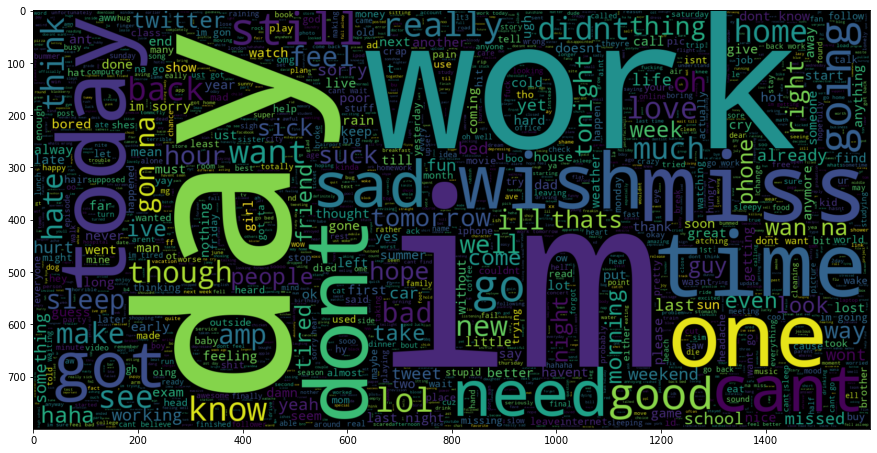

In [124]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

### Word-Cloud for Positive tweets.

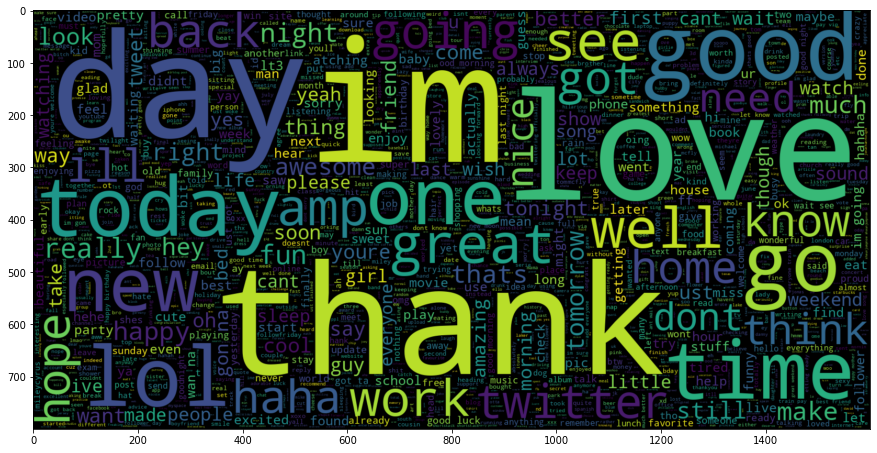

In [125]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

## Vectorization and Splitting the data <a id="6"></a>
Storing input variable-processes_tweets to X and output variable-polarity to y

In [126]:
X = data['processed_tweets'].values
y = data['polarity'].values


In [127]:
print(X.shape)
print(y.shape)

(10000,)
(10000,)


## Convert text to word frequency vectors
### TF-IDF
 This is an acronym than stands for **Term Frequency – Inverse Document** Frequency which are the components of the resulting scores assigned to each word.

* Term Frequency: This summarizes how often a given word appears within a document.
* Inverse Document Frequency: This downscales words that appear a lot across documents.

In [128]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names()))

Vector fitted.
No. of feature_words:  18602


In [129]:
print(X.shape)
print(y.shape)

(10000, 18602)
(10000,)


## Split train and test

The Preprocessed Data is divided into 2 sets of data:

* Training Data: The dataset upon which the model would be trained on. Contains 80% data.
* Test Data: The dataset upon which the model would be tested against. Contains 20% data.




In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

In [131]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (8000, 18602)
y_train (8000,)

X_test (2000, 18602)
y_test (2000,)


In [132]:
X_train

<8000x18602 sparse matrix of type '<class 'numpy.float64'>'
	with 59691 stored elements in Compressed Sparse Row format>

# Model Building <a id="7"></a>

### Model evaluating function

In [133]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Logistic Regression <a id="8"></a>

Accuracy of model on training data : 88.9
Accuracy of model on testing data : 71.55 

              precision    recall  f1-score   support

           0       0.75      0.67      0.71      1025
           1       0.69      0.76      0.72       975

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000



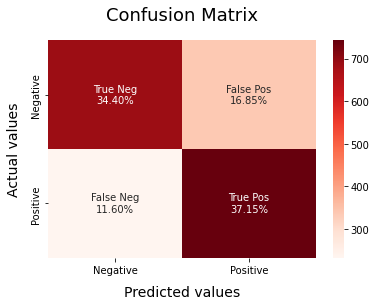

In [134]:
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

### Linear SVM <a id="9"></a>

Accuracy of model on training data : 98.46249999999999
Accuracy of model on testing data : 70.15 

              precision    recall  f1-score   support

           0       0.73      0.67      0.70      1025
           1       0.68      0.74      0.71       975

    accuracy                           0.70      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.70      0.70      0.70      2000



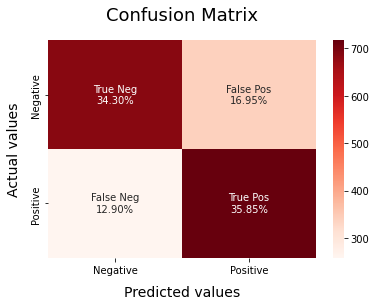

In [135]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

### Random Forest <a id="10"></a>

Accuracy of model on training data : 84.425
Accuracy of model on testing data : 68.15 

              precision    recall  f1-score   support

           0       0.74      0.59      0.65      1025
           1       0.64      0.78      0.71       975

    accuracy                           0.68      2000
   macro avg       0.69      0.68      0.68      2000
weighted avg       0.69      0.68      0.68      2000



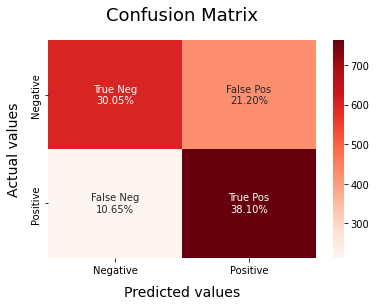

In [136]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

### Naive Bayes <a id="11"></a>

Accuracy of model on training data : 93.27499999999999
Accuracy of model on testing data : 71.45 

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1025
           1       0.72      0.67      0.70       975

    accuracy                           0.71      2000
   macro avg       0.72      0.71      0.71      2000
weighted avg       0.72      0.71      0.71      2000



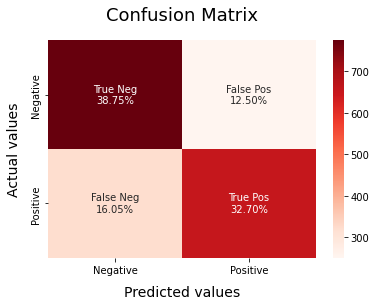

In [137]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

# Model Saving, Loading and Prediction <a id="13"></a>

In [138]:
import pickle

file = open('vectoriser.pickle','wb')
pickle.dump(vector, file)
file.close()

file = open('logisticRegression.pickle','wb')
pickle.dump(lg, file)
file.close()

file = open('SVM.pickle','wb')
pickle.dump(svm, file)
file.close()

file = open('RandomForest.pickle','wb')
pickle.dump(rf, file)
file.close()

file = open('NaivesBayes.pickle','wb')
pickle.dump(nb, file)
file.close()

### Predict using saved model

In [139]:
def load_models():
    # Load the vectoriser.
    file = open('vectoriser.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('logisticRegression.pickle', 'rb')
    lg = pickle.load(file)
    file.close()
    return vectoriser, lg

In [140]:
def predict(vectoriser, model, text):
    # Predict the sentiment
    processes_text=[process_tweets(sen) for sen in text]
    textdata = vectoriser.transform(processes_text)
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [141]:
if __name__=="__main__":
    # Loading the models.
    vectoriser, lg = load_models()
    
    # Text to classify should be in a list.
    text = ["I love machine learning",
            "Work is too hectic.",
            "Mr.Sharama, I feel so good",
            "xin chao"]
    
    df = predict(vectoriser, lg, text)
    print(df.head())


                         text sentiment
0     I love machine learning  Positive
1         Work is too hectic.  Positive
2  Mr.Sharama, I feel so good  Positive
3                    xin chao  Positive
